**Генетический алгоритм** — это техника оптимизации на основе поиска, копирующая естественный отбор и генетику. В ней используется такое же сочетание отбора, кроссинговера и мутаций для изменения исходной случайной популяции.  
Y = w1x1 + w2x2 + w3x3 + w4x4 + w5x5 + w6x6 - это уравнение, которое мы реализуем в задаче.  
 Уравнение имеет 6 входных данных (от x1 до x6) и 6 весовых коэффициентов (от w1 до w6), как показано, а входные значения (x1, x2, x3, x4, x5, x6) = (4, -2,7,5,11, 1). Мы ищем параметры (веса), которые максимизируют такое уравнение. Идея максимизации такого уравнения кажется простой. Положительное значение должно быть умножено на максимально возможное положительное число, а отрицательное число должно быть умножено на наименьшее возможное отрицательное число.  
  Но идея, которую мы ищем, заключается в том, чтобы заставить GA делать это самостоятельно, чтобы знать, что лучше использовать положительный вес с положительными входами и отрицательный вес с отрицательными входами.  
  GA является методом случайной оптимизации. Он пытается улучшить текущие решения, применяя к ним некоторые случайные изменения. Поскольку такие изменения являются случайными, мы не уверены, что они приведут к лучшим решениям. По этой причине предпочтительно сохранить предыдущие лучшие решения (родителей) в новой популяции. В худшем случае, когда все новые дети хуже, чем такие родители, мы будем продолжать использовать таких родителей. В результате мы гарантируем, что новое поколение, по крайней мере, сохранит предыдущие хорошие результаты и не станет хуже. У нового поколения будут первые 4 решения от предыдущих родителей.

(8, 6)
[[ 2.53439757 -3.26457606 -3.04688616  2.50731639 -2.79208752  3.50731628]
 [-2.18794423 -0.65029318  3.70004166 -1.74972104 -0.57172632 -0.13263232]
 [ 1.39221546 -2.6014969   2.54177553  3.95148203  2.4950558  -3.26228907]
 [-3.30659098 -3.05058586  1.80235722 -3.83449565 -2.64800817 -1.96560864]
 [-1.70163708 -0.32113088 -0.90988159 -1.90173471  2.96392953 -3.6753722 ]
 [ 1.84459105  0.29307662  0.10955137  2.0284714   3.55061702 -1.77050021]
 [ 0.84572239  0.24420407  0.86691827  2.14989439  0.10938111  0.69774771]
 [ 1.03359516  3.23685156 -1.10478814 -2.94364712 -2.83504544 -3.36505468]]
Generation :  0
P [[ 2.53439757 -3.26457606 -3.04688616  2.50731639 -2.79208752  3.50731628]
 [ 1.39221546 -2.6014969   2.54177553  3.95148203  2.4950558  -3.26228907]]
Off [[ 2.53439757 -3.26457606 -3.04688616  3.95148203  3.29438214 -3.26228907]
 [ 1.39221546 -2.6014969   2.54177553  2.50731639 -2.13508804  3.50731628]
 [ 2.53439757 -3.26457606 -3.04688616  3.95148203  3.11256265 -3.2622

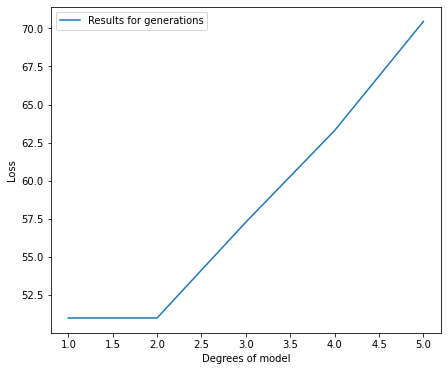

In [7]:
import numpy 
import matplotlib.pyplot as plt

# входные данные
equation_inputs = [4,-2,3.5,5,-11,-4.7]
#количество весов, которые мы хотим оптимизировать
num_weights = 6

sol_per_pop = 8
num_parents_mating = 2

# размер популяции
pop_size = (sol_per_pop,num_weights) # популяция с 8 хромосомами(по 6 генов)
print(pop_size)
#начальная популяция
new_population = numpy.random.uniform(low=-4.0, high=4.0, size=pop_size)
print(new_population)

class GA:
    def cal_pop_fitness(equation_inputs, pop):
        # фитнесс функция считает сумму произведений иксов и весов
        fitness = numpy.sum(pop*equation_inputs, axis=1)
        return fitness

    def select_mating_pool(pop, fitness, num_parents):
        # выбор лучших индивидов как родителей для след поколения
        parents = numpy.empty((num_parents, pop.shape[1]))
        for parent_num in range(num_parents):
            max_fitness_idx = numpy.where(fitness == numpy.max(fitness))
            #print("1",max_fitness_idx)
            max_fitness_idx = max_fitness_idx[0][0]
            #print("2",max_fitness_idx)
            parents[parent_num, :] = pop[max_fitness_idx, :]
            #print("P",parents)
            fitness[max_fitness_idx] = -99999999999
  
        return parents

    def crossover(parents, offspring_size):
        offspring = numpy.empty(offspring_size)
        # точка где будт скрещевание двух родителей(середина)
        crossover_point = numpy.uint8(offspring_size[1]/2)

        for k in range(offspring_size[0]):
            # индекс первого родителя для содинения
            parent1_idx = k%parents.shape[0]
            # индекс второго
            parent2_idx = (k+1)%parents.shape[0]
            # новое потомство будет иметь половину генов от 1 родителя
            offspring[k, 0:crossover_point] = parents[parent1_idx, 0:crossover_point]
            # будет с половиной генов от второго 
            offspring[k, crossover_point:] = parents[parent2_idx, crossover_point:]
        return offspring

    def mutation(offspring_crossover):
        # мутация меняет один ген в каждом потомстве случайно
        for idx in range(offspring_crossover.shape[0]):
            # случайное значение добавляемое к гену
            random_value = numpy.random.uniform(-1.0, 1.0, 1)
            offspring_crossover[idx, 4] = offspring_crossover[idx, 4] + random_value
        return offspring_crossover

g = []
r = []
num_generations = 5
for generation in range(num_generations):
    print("Generation : ", generation)
    # функция приспособленности для каждой хромосомы в популяции
    fitness = GA.cal_pop_fitness(equation_inputs, new_population)

    # выбор лучших родителей для связи
    parents = GA.select_mating_pool(new_population, fitness, 
                                      num_parents_mating)

    # новое покление через скрещивание(4 с 6 весами)
    offspring_crossover = GA.crossover(parents,
                                       offspring_size=(pop_size[0]-parents.shape[0], num_weights))
    

    # добоавление вариаций в потомство мутацией
    offspring_mutation = GA.mutation(offspring_crossover)

    # создание нового поколения по родителям и потомству.

    new_population[0:parents.shape[0], :] = parents
    print("P",parents)
    new_population[parents.shape[0]:, :] = offspring_mutation
    print("Off",offspring_mutation)


    # лучший результат на итерации
    g.append(generation+1)
    r.append(numpy.max(numpy.sum(new_population*equation_inputs, axis=1)))
    print("Best result : ", numpy.max(numpy.sum(new_population*equation_inputs, axis=1)))

# лучшее решение из всех поколений.

fitness = GA.cal_pop_fitness(equation_inputs, new_population)
# вернуть индекс с лучшим значением прсипособленности
best_match_idx = numpy.where(fitness == numpy.max(fitness))

print("Best solution : ", new_population[best_match_idx, :])
print("Best solution fitness : ", fitness[best_match_idx])
plt.figure(figsize=(7, 6))
plt.ylabel("Loss")
plt.xlabel("Degrees of model")
plt.plot(g,r,label='Results for generations')
plt.legend()
plt.show()


После вышеуказанных 5 поколений лучший результат теперь имеет значение пригодности, равное 70.4556863